In [5]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("AusApparalSales4thQrt2020.csv")

In [7]:
print("Missing Values:\n" , df.isna().sum())

Missing Values:
 Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [8]:
df = df.dropna()

In [9]:
df['Sales_Norm'] = (df['Sales'] - df['Sales'].min()) / (df['Sales'].max() - df['Sales'].min())

In [10]:
state_sales = df.groupby("State")["Sales"].sum().sort_values(ascending=False)
group_sales = df.groupby("Group")["Sales"].sum()

In [11]:
# 1. Descriptive statistics
print("Sales Statistics:\n", df['Sales'].describe())
print("Units Statistics:\n", df['Unit'].describe())

Sales Statistics:
 count      7560.000000
mean      45013.558201
std       32253.506944
min        5000.000000
25%       20000.000000
50%       35000.000000
75%       65000.000000
max      162500.000000
Name: Sales, dtype: float64
Units Statistics:
 count    7560.000000
mean       18.005423
std        12.901403
min         2.000000
25%         8.000000
50%        14.000000
75%        26.000000
max        65.000000
Name: Unit, dtype: float64


In [12]:
# 2. Identify top and lowest performing groups
top_group = group_sales.idxmax()
low_group = group_sales.idxmin()
print(f"Highest Sales Group: {top_group}, Lowest Sales Group: {low_group}")

Highest Sales Group:  Men, Lowest Sales Group:  Seniors


C:\Users\Mr. Trivedi\AppData\Local\Temp\ipykernel_8404\499019826.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.index, y=state_sales.values, palette="viridis")


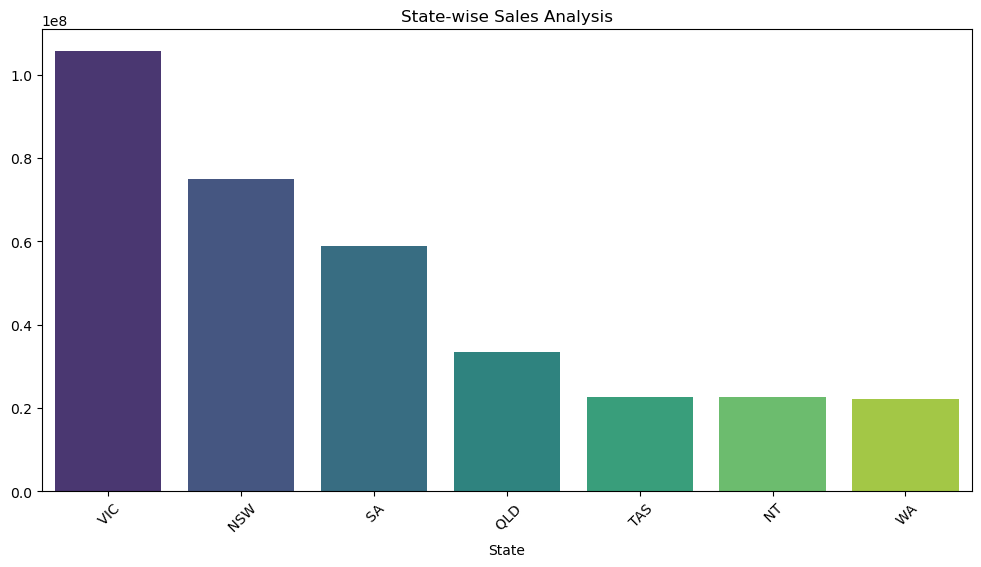

In [13]:
## Data Visualization
plt.figure(figsize=(12,6))
sns.barplot(x=state_sales.index, y=state_sales.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("State-wise Sales Analysis")
plt.show()

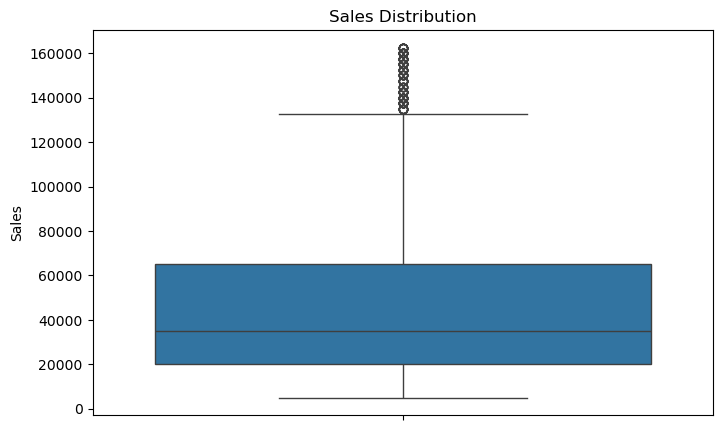

In [14]:
# Box plot for descriptive statistics
plt.figure(figsize=(8,5))
sns.boxplot(y=df['Sales'])
plt.title("Sales Distribution")
plt.show()

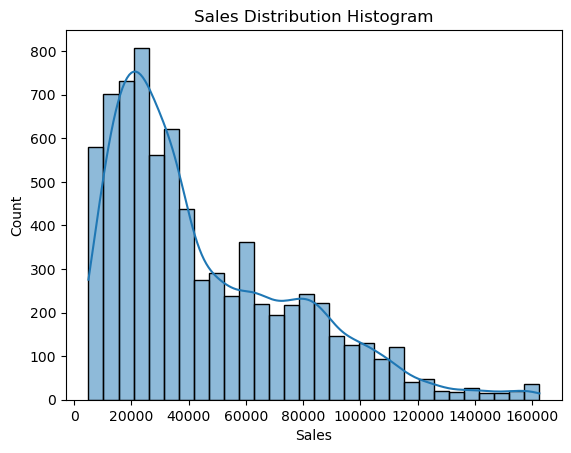

In [15]:
# Seaborn distribution plot
sns.histplot(df['Sales'], kde=True, bins=30)
plt.title("Sales Distribution Histogram")
plt.show()

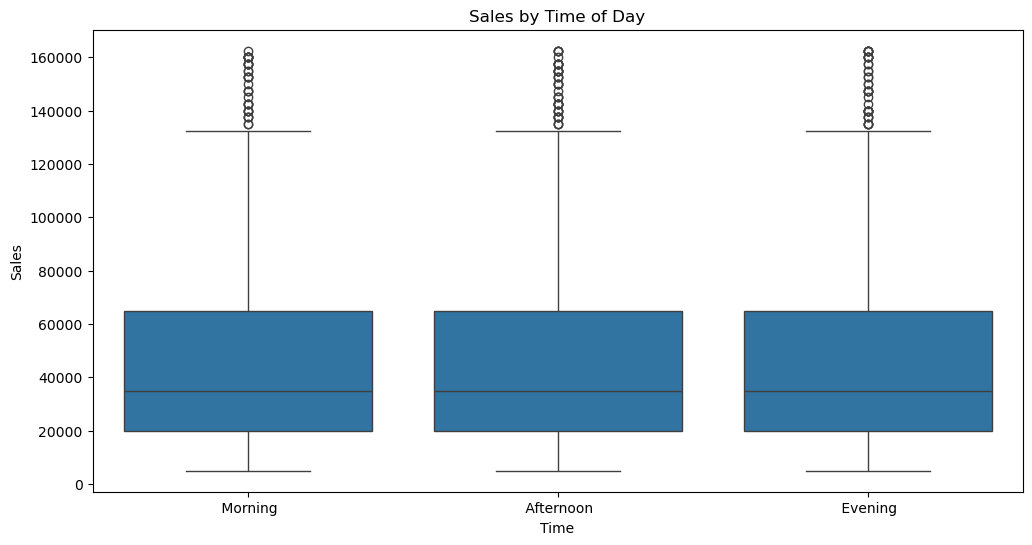

In [16]:
# Time-of-the-day analysis
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Time'], y=df['Sales'])
plt.title("Sales by Time of Day")
plt.show()

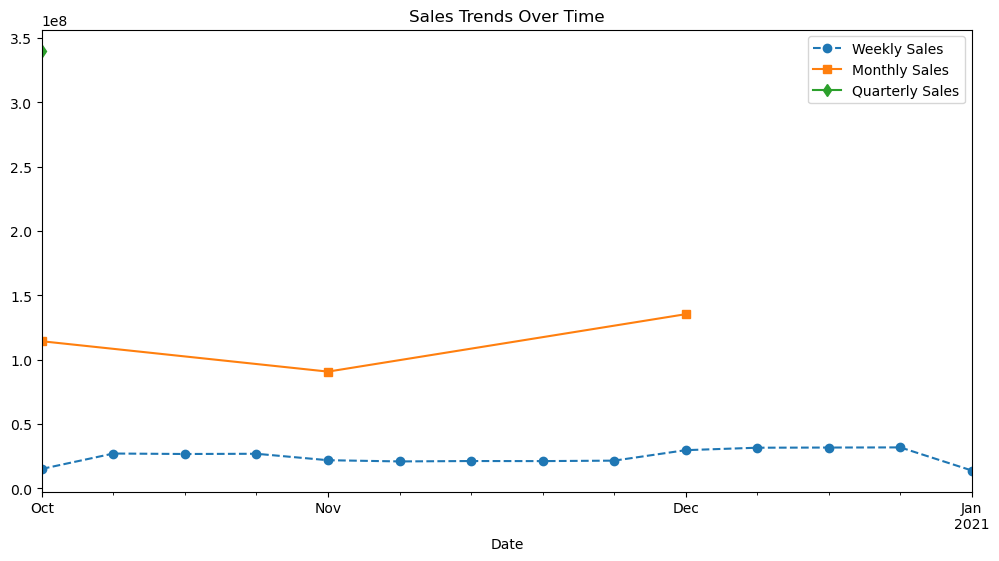

In [20]:
plt.figure(figsize=(12,6))
weekly_sales.plot(label='Weekly Sales', linestyle='--', marker='o')
monthly_sales.plot(label='Monthly Sales', linestyle='-', marker='s')
quarterly_sales.plot(label='Quarterly Sales', linestyle='-', marker='d')
plt.legend()
plt.title("Sales Trends Over Time")
plt.show()

C:\Users\Mr. Trivedi\AppData\Local\Temp\ipykernel_8404\1816861271.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_sales.index, y=group_sales.values, palette="coolwarm")


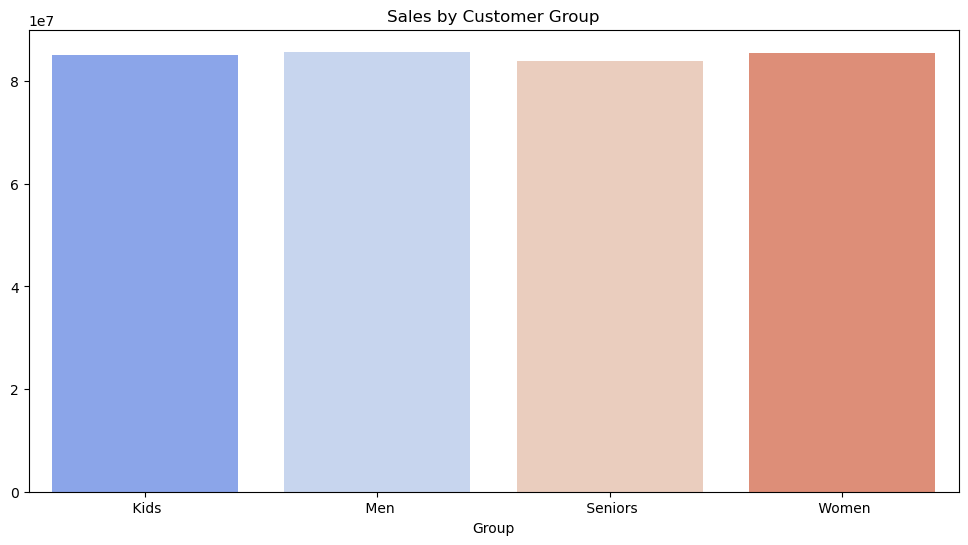

In [21]:
# Sales Analysis by Demographic Group
plt.figure(figsize=(12,6))
sns.barplot(x=group_sales.index, y=group_sales.values, palette="coolwarm")
plt.title("Sales by Customer Group")
plt.show()

Non-numeric columns: Index(['Time', 'State', 'Group'], dtype='object')


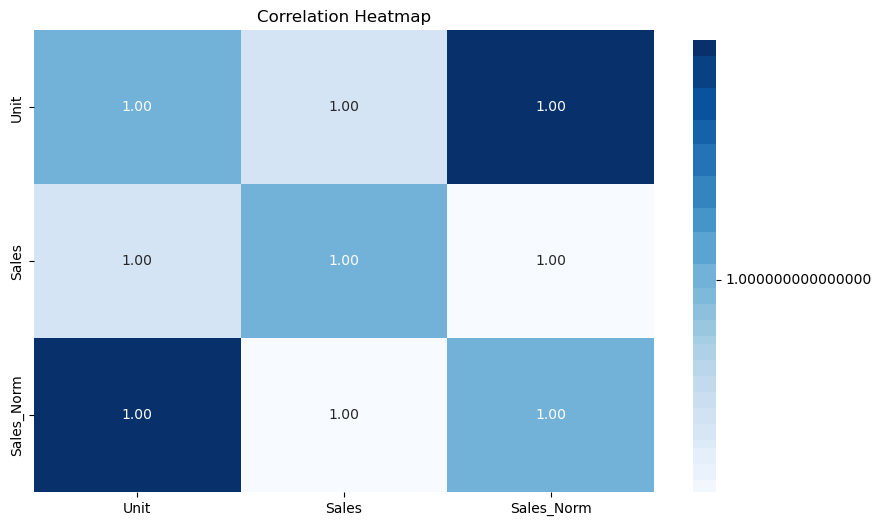

In [23]:
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_cols)
df_numeric = df.drop(columns=non_numeric_cols)
df_numeric.fillna(df_numeric.mean(), inplace=True)
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="Blues", fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()